# T81-577: Applied Data Science for Practitioner

**Final Project: Data Analysis on Wine Dataset**

**Author: Qin Wu**

**Instructor: [Asim Banskota](https://sever.wustl.edu/faculty/Pages/default.aspx), School of Engineering and Applied Science, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)**

**Data Source: https://archive.ics.uci.edu/ml/datasets/wine+quality**


---
**Business Goal & Supporting objectives**

Nowadays, with the improvement of life quality and social-contact need, more and more people find the charm of wine. People's requirement for the quality of wine becomes higher and higher. Moreover, the competition between wine industry is quite fierce, which impels wine industry to make great efforts to meet the customers' demand. 
As we all know, wine is made by fermentation. Physicochemical and sensory tests are used for evaluating wine certification[1].The quality changes with the difference of its chemical information.  

In this project, the dataset I use contains 1599 instances for red wine and 4898 instances  for  white  wine with 14 same chemical information variables about wine. With this dataset, I can do regression and classification analysis. On the one hand, I use regression method to predict the quality. The aim of regression similar to other applications is to create models from data to predict wine quality. And this model can be used in our future application to get the quality of our products based on their chemical information, which effectively helps us control the quality of our products. On the other hand, I use classification method to predict the color(red wine or white wine) based on the variables. This can help wine industry protect and assure the quality of wines, forbid adulteration of wines and control beverage processing[2].






---




**This project is divided into 4 parts:**

*   Import Data & Python Packages
*   Exploratory Data Analysis
    *   Assess Data Quality & Missing Values
    *   Descriptive Statistics
    *   Data Visualizations
*   Model Training
    *   Predicting the Quality (Regression)
    *   Predicting the Color (Classification)
*   Improvement of the Performance of the Quality Prediction

























---


**References and Citations**

[1] Er, Yeşim, Atasoy ,and Ayten.The Classification of White Wine and Red Wine According to Their Physicochemical Qualities. International Journal of Intelligent Systems and Applications in Engineering. 10.18201/ijisae.265954

[2] Gonzalez Viejo, Claudia, Torrico, Damir, Dunshea, Frank,Fuentes, and Sigfredo. Emerging technologies based on artificial intelligence to assess quality and consumer preference of beverages. 10.3390/beverages5040062

[3] https://github.com/jeffheaton/t81_558_deep_learning

[4] https://sriramjaju.github.io/2017-09-10-EDA-RedWine/

[5] https://github.com/abanskota/t81_577_data_science





Map my GDrive to /content/drive.

In [0]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Note: using Google CoLab


**1. Import Data & Python Packages**

In [0]:
import numpy as np 
from numpy import arange

import pandas as pd 
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from matplotlib import pyplot
import matplotlib.pyplot as plt 

#import statsmodels.api as sm
#import statsmodels.formula.api as smf

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
#from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from matplotlib import pyplot
#from ggplot import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load wine quality data into Pandas
wine_red = pd.read_csv('/content/drive/My Drive/SP2020/Data Science/Wine/winequality-red.csv',';')
wine_white = pd.read_csv('/content/drive/My Drive/SP2020/Data Science/Wine/winequality-white.csv',';')

In [0]:
wine_red["color"] = "red"
wine_white["color"] = "white"

In [0]:
wine_all=pd.concat([wine_red,wine_white],axis=0)

In [0]:
wine_red.rename(columns={'fixed acidity': 'fixed_acidity',
                         'citric acid':'citric_acid',
                         'volatile acidity':'volatile_acidity',
                         'residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide',
                         'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [0]:
wine_white.rename(columns={'fixed acidity': 'fixed_acidity',
                           'citric acid':'citric_acid',
                           'volatile acidity':'volatile_acidity',
                           'residual sugar':'residual_sugar',
                           'free sulfur dioxide':'free_sulfur_dioxide',
                           'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [0]:
wine_all.rename(columns={'fixed acidity': 'fixed_acidity',
                         'citric acid':'citric_acid',
                         'volatile acidity':'volatile_acidity',
                         'residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide',
                         'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

**2. Exploratory Data Analysis**

2.1 Assess Data Quality & Missing Values

In [0]:
print('The mean quality of white wine is {}'.format(wine_white['quality'].mean()))
print('The mean quality of red wine is {}'.format(wine_red['quality'].mean()))

The mean quality of white wine is 5.87790935075541
The mean quality of red wine is 5.6360225140712945


In [0]:
wine_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [0]:
wine_all.describe

<bound method NDFrame.describe of       fixed_acidity  volatile_acidity  citric_acid  ...  alcohol  quality  color
0               7.4              0.70         0.00  ...      9.4        5    red
1               7.8              0.88         0.00  ...      9.8        5    red
2               7.8              0.76         0.04  ...      9.8        5    red
3              11.2              0.28         0.56  ...      9.8        6    red
4               7.4              0.70         0.00  ...      9.4        5    red
...             ...               ...          ...  ...      ...      ...    ...
4893            6.2              0.21         0.29  ...     11.2        6  white
4894            6.6              0.32         0.36  ...      9.6        5  white
4895            6.5              0.24         0.19  ...      9.4        6  white
4896            5.5              0.29         0.30  ...     12.8        7  white
4897            6.0              0.21         0.38  ...     11.8        6  

2.2 Descriptive Statistics

In [0]:
#show the first five rows of the dataset
wine_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [0]:
#show the last five rows of the dataset
wine_all.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [0]:
#print out all column names 
wine_all.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [0]:
#data types of each columns
wine_all.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [0]:
#size of the dataframe
wine_all.shape

(6497, 13)

In [0]:
#convert the color column into dummy variables
wine = pd.get_dummies(wine_all, columns=["color"])

In [0]:
wine["color_red"].value_counts()

0    4898
1    1599
Name: color_red, dtype: int64

In [0]:
wine.groupby('color_white').size()

color_white
0    1599
1    4898
dtype: int64

In [0]:
display(wine)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


2.3 Data Visualizations

a. Univariate Exploratory Data Analysis

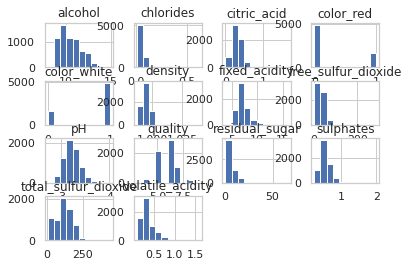

In [0]:
# Histograms for each attribute
wine.hist()
pyplot.show()

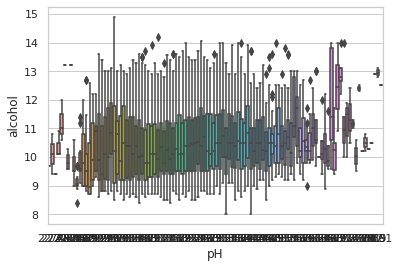

In [0]:
#Boxplots
sns.boxplot(x="pH", y="alcohol", data=wine)

b. Bivariate Exploratory Data Analysis

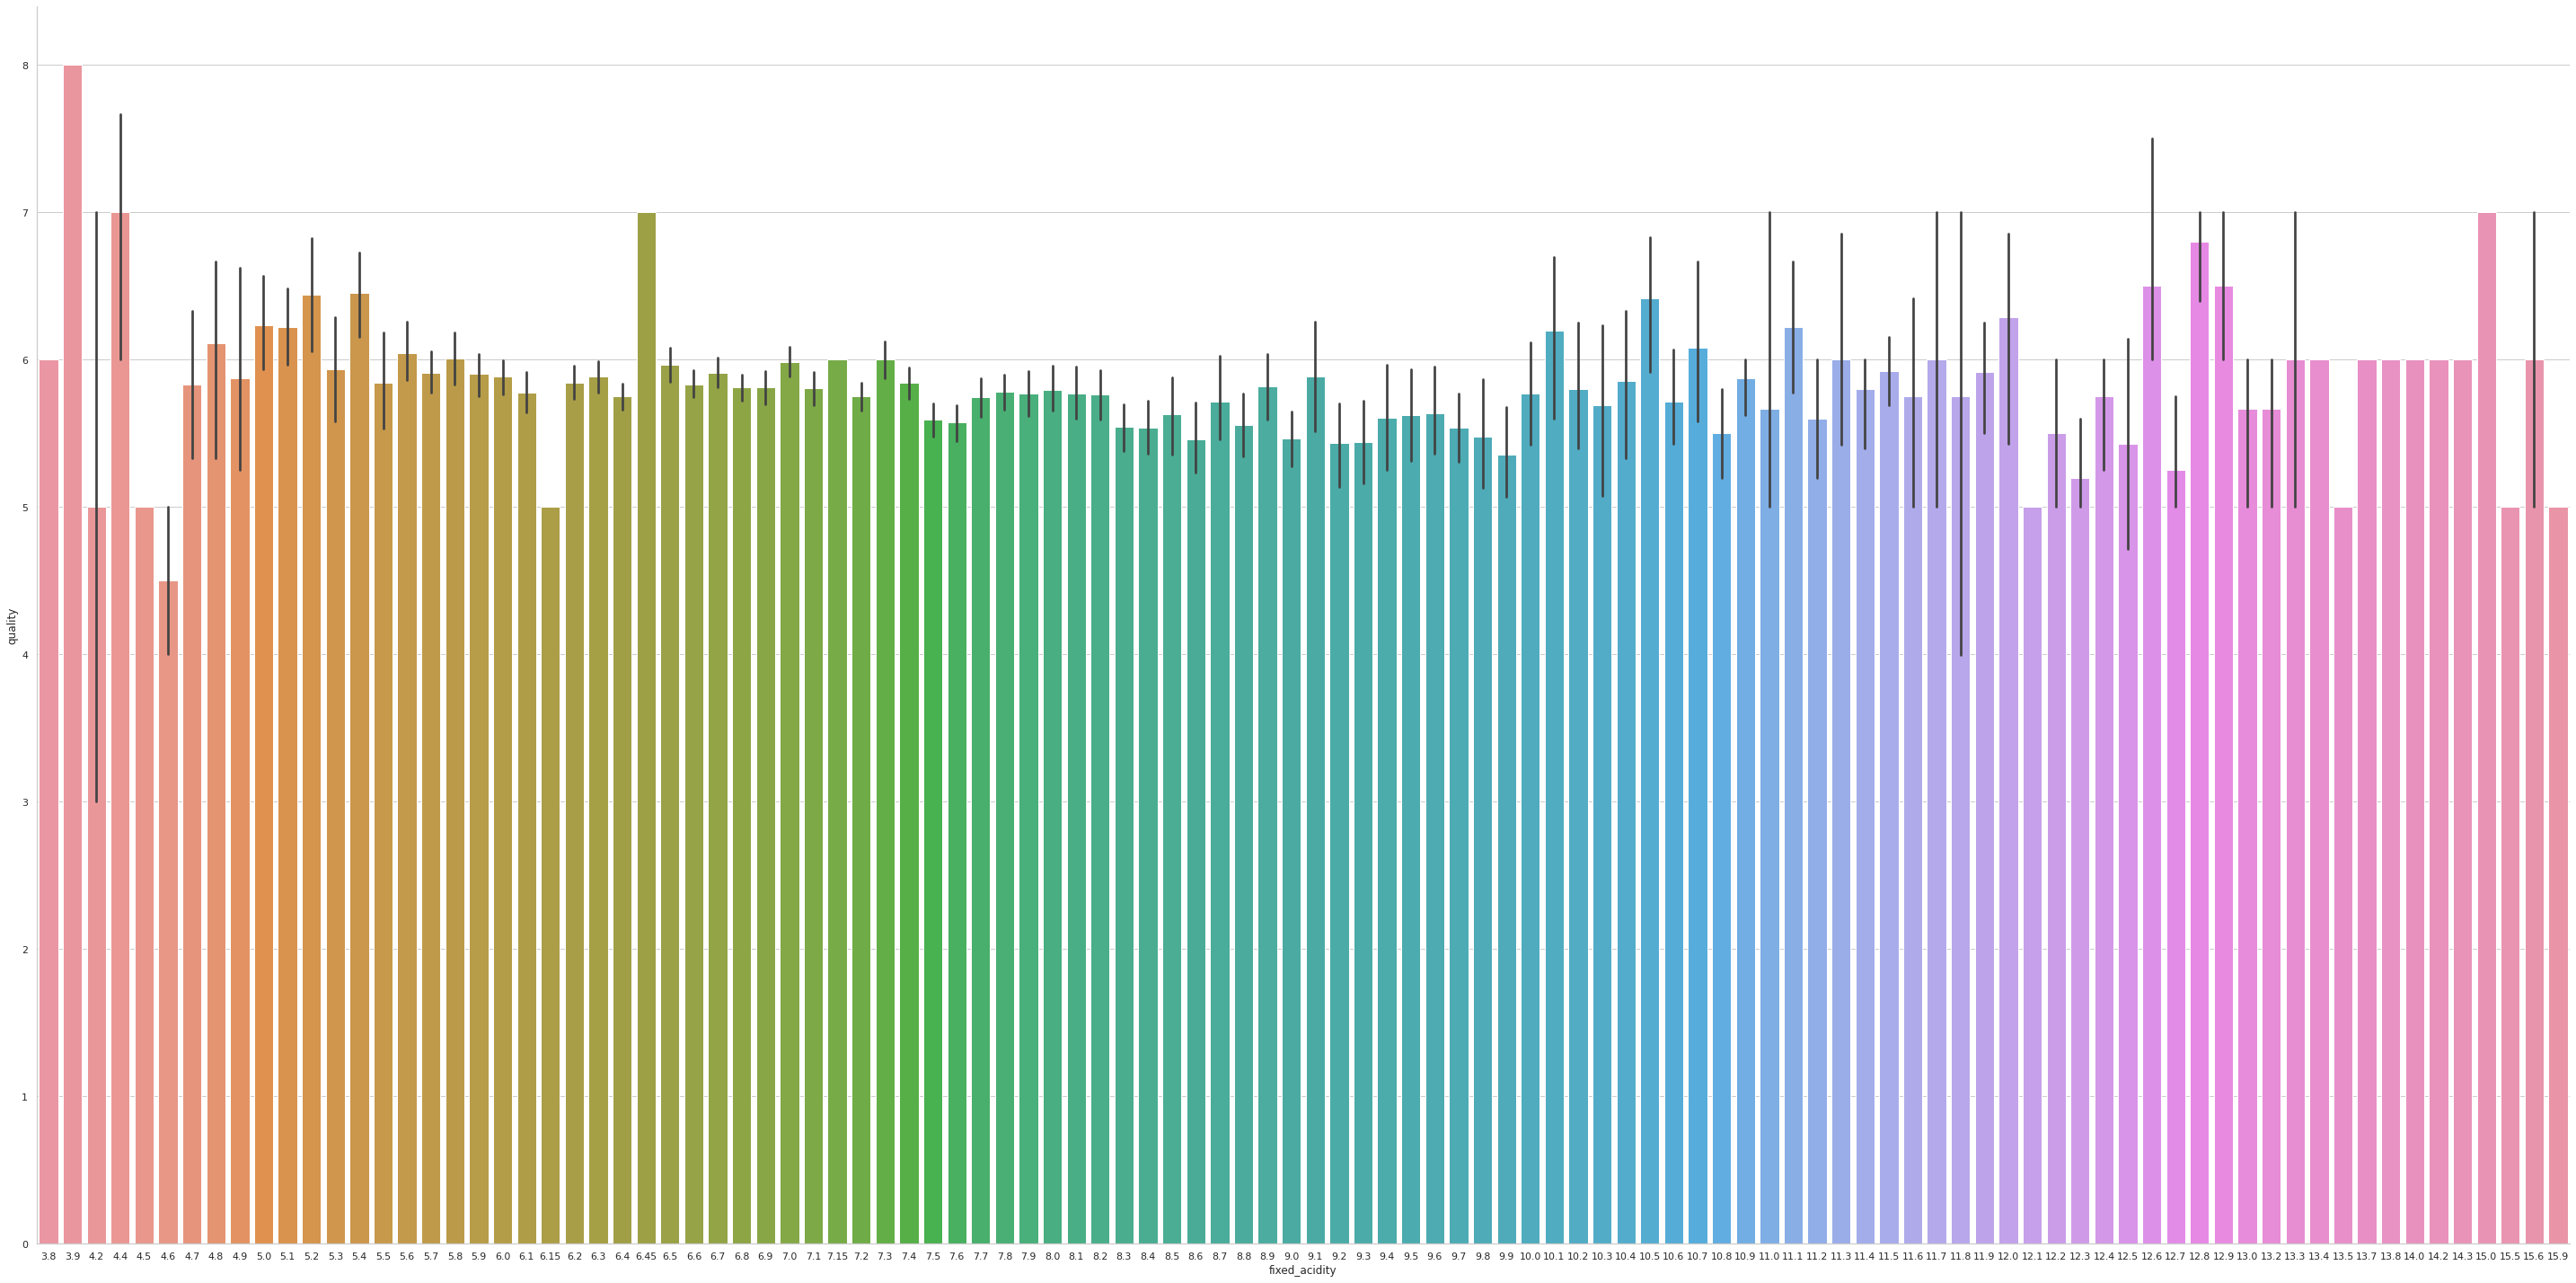

In [0]:
#Categorical plots
sns.catplot(x = 'fixed_acidity', y = 'quality', data = wine, kind = "bar", height = 20, aspect = 2);

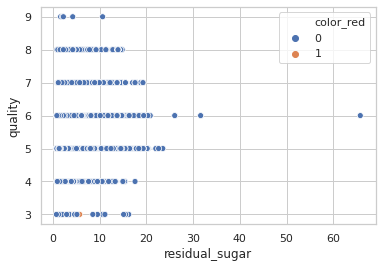

In [0]:
#Scatter plots
sns.scatterplot(x = "residual_sugar",  y = "quality", data = wine, hue = "color_red");

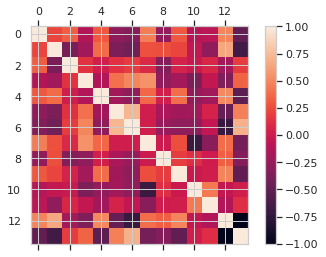

In [0]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(wine.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

**3. Model Training**

3.1 Predicting the Quality (Regression)


a. Data Preparation

Split the data into train and test test. I use 80% of the sample for training and 20% for testing.

In [0]:
X = wine
X = X.drop(columns=['quality'], axis=1)
y = wine.quality

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [0]:
print('The lenghth of X_train is {}'.format(len(X_train)))
print('The lenghth of X_test is {}'.format(len(X_test)))
print('The lenghth of y_train is {}'.format(len(y_train)))
print('The lenghth of y_test is {}'.format(len(y_test)))

The lenghth of X_train is 5197
The lenghth of X_test is 1300
The lenghth of y_train is 5197
The lenghth of y_test is 1300


b. Training

(i) Linear Regression

Text(0, 0.5, 'Predicted')

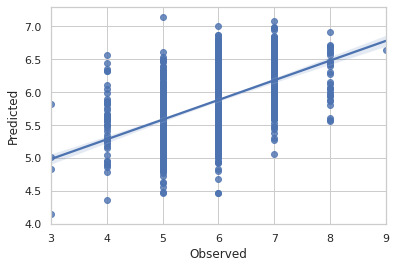

In [0]:
LiR = LinearRegression()
LiR.fit(X_train, y_train)
LiR_pred = LiR.predict(X_test)
sns.regplot(y_test, LiR_pred)
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [0]:
LiR_mae = mean_absolute_error(y_test, LiR_pred)
LiR_r2 = r2_score(y_test, LiR_pred)
print("The model performance for baseline model is:")
print("---------------------------------------------")
print('Mean Absolute error is {}'.format(LiR_mae))
print('R2 score is {}'.format(LiR_r2))

The model performance for baseline model is:
---------------------------------------------
Mean Absolute error is 0.5667943085622551
R2 score is 0.2772410346805715


(ii) Lasso regression

In [0]:
rsq = list()
alphas = np.linspace(0.001, 1, num=20)
for alpha in alphas:
    reg_lasso = Lasso(alpha=alpha)
    reg_lasso.fit(X, y)
    rsq.append(reg_lasso.score(X_test,y_test))

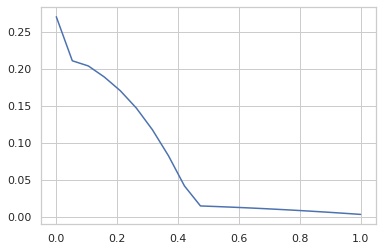

In [0]:
plt.plot(alphas,rsq)


In [0]:
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X, y)
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

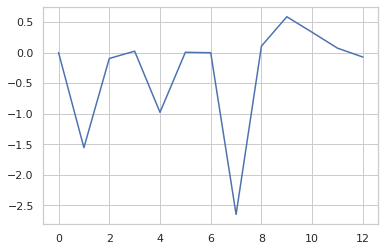

In [0]:
plt.plot(reg_ridge.coef_, color = 'b')

(iii) Random Forest Regressor

Text(0, 0.5, 'Predicted')

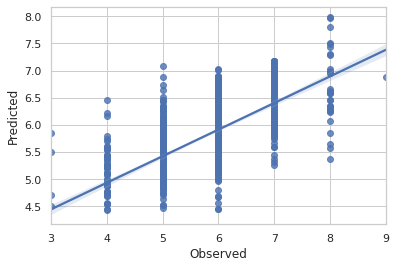

In [0]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
sns.regplot(y_test, rfr_pred)
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [0]:
rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_r2 = r2_score(y_test, rfr_pred)
print("The model performance for baseline model is:")
print("---------------------------------------------")
print('Mean Absolute error is {}'.format(rfr_mae))
print('R2 score is {}'.format(rfr_r2))

The model performance for baseline model is:
---------------------------------------------
Mean Absolute error is 0.4445615384615385
R2 score is 0.4866404771220405


3.2 Predicting the Color (Classification)


a. Data Preparation

In [0]:
C = wine_all
C = C.drop(columns=['color'], axis=1)
c = wine_all['color']

Split the data into train and test test. I use 80% of the sample for training and 20% for testing.

In [0]:
C_train, C_test, c_train, c_test = train_test_split(C, c, test_size = 0.20, random_state = 1)

b. Training

(i) Logistic Regression Classifier

In [0]:
transformer = ColumnTransformer([("norm1", SimpleImputer(missing_values=np.nan, strategy='mean'), [0, 3]),
                                 ('poly', PolynomialFeatures(3),[0,1])])


In [0]:
logistic_model=Pipeline(steps=([('transformer', transformer),
                      ('scaler',MinMaxScaler(feature_range=(0,1))), ('LR', LogisticRegression())]))

In [0]:
lr = logistic_model.fit(C_train,c_train)

In [0]:
lr_pred = logistic_model.predict(C_test);
print(f"Accuracy of Logistic Regression Classifier: {accuracy_score(c_test, lr_pred)}")

Accuracy of Logistic Regression Classifier: 0.9323076923076923


(ii) Random Forest Classifier


In [0]:
def return_as_it_is(X):
    return X*1
    
rf_model = Pipeline(steps=([('transformer', transformer),('do_nothing',FunctionTransformer(return_as_it_is)),
                      ('scaler',MinMaxScaler(feature_range=(0,1))), ('LR', RandomForestClassifier())]))

In [0]:
rf = rf_model.fit(C_train,c_train)

In [0]:
rf_pred = rf_model.predict(C_test);
print(f"Accuracy of Random Forest Classifier: {accuracy_score(c_test, rf_pred)}")

Accuracy of Random Forest Classifier: 0.9476923076923077


(iii) Self-defined Classifier

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from sklearn.model_selection import train_test_split 

X_my_model = C.values
dummies = pd.get_dummies(wine_all['color']) # Classification
species = dummies.columns
y_my_model = dummies.values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_my_model, y_my_model, test_size = 0.20, random_state = 1)

my_model = Sequential()
my_model.add(Dense(50, input_dim=X_my_model.shape[1], activation='relu')) # Hidden 1
my_model.add(Dense(25, activation='relu')) # Hidden 2
my_model.add(Dense(y_my_model.shape[1],activation='softmax')) # Output
my_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
my = my_model.fit(X_train_2,y_train_2,verbose=2,epochs=100)

Epoch 1/100
163/163 - 0s - loss: 0.7340
Epoch 2/100
163/163 - 0s - loss: 0.1832
Epoch 3/100
163/163 - 0s - loss: 0.1609
Epoch 4/100
163/163 - 0s - loss: 0.1484
Epoch 5/100
163/163 - 0s - loss: 0.1302
Epoch 6/100
163/163 - 0s - loss: 0.1248
Epoch 7/100
163/163 - 0s - loss: 0.1155
Epoch 8/100
163/163 - 0s - loss: 0.1108
Epoch 9/100
163/163 - 0s - loss: 0.0987
Epoch 10/100
163/163 - 0s - loss: 0.0967
Epoch 11/100
163/163 - 0s - loss: 0.0971
Epoch 12/100
163/163 - 0s - loss: 0.0953
Epoch 13/100
163/163 - 0s - loss: 0.0869
Epoch 14/100
163/163 - 0s - loss: 0.0784
Epoch 15/100
163/163 - 0s - loss: 0.0772
Epoch 16/100
163/163 - 0s - loss: 0.0889
Epoch 17/100
163/163 - 0s - loss: 0.0743
Epoch 18/100
163/163 - 0s - loss: 0.0722
Epoch 19/100
163/163 - 0s - loss: 0.0683
Epoch 20/100
163/163 - 0s - loss: 0.0731
Epoch 21/100
163/163 - 0s - loss: 0.0680
Epoch 22/100
163/163 - 0s - loss: 0.0763
Epoch 23/100
163/163 - 0s - loss: 0.0759
Epoch 24/100
163/163 - 0s - loss: 0.0635
Epoch 25/100
163/163 - 0s

In [0]:
y_pred_2 = my_model.predict(X_test_2);
predict_classes = np.argmax(y_pred_2,axis=1)
expected_classes = np.argmax(y_test_2,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy of Self-defined Classifier: {correct}")

Accuracy of Self-defined Classifier: 0.9853846153846154


**4. Improvement of the performance of the quality prediction**

In [0]:
param_grid_rf = {
    'n_estimators': [100,200,300,400,500]
}

from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid_rf, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train);

best_grid = grid_search.best_estimator_

y_pred_gridsearch = best_grid.predict(X_test)

mae_gridsearch = mean_absolute_error(y_test, y_pred_gridsearch)
r2_gridsearch=r2_score(y_test, y_pred_gridsearch)
print("The model performance for testing set from grid search")
print("--------------------------------------")
print('mean absoulte error is {}'.format(mae_gridsearch))
print('R2 score is {}'.format(r2_gridsearch))
print('Improvement of {:0.2f}%.'.format( 100 * (r2_gridsearch- rfr_r2) / rfr_r2))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


The model performance for testing set from grid search
--------------------------------------
mean absoulte error is 0.4402215384615385
R2 score is 0.4941566677593664
Improvement of 1.54%.
